# Parse the bounded chars.

In [2]:
import re
import os
from PIL import Image

character_counts_per_type = {}
character_counts_per_doc = {}
rescaled_widths = []
rescaled_heights = []
# The first line contains a header and can be ignored.
for line in open('../Datasets/train.csv').readlines()[1:]:
    image_id, raw_char_data = line.split(',')
    
    image = Image.open(os.path.join('../Datasets/train_images', image_id + '.jpg'))
    image_width, image_height = image.size
    
    char_parsing_regex = r'(U\+[A-Z0-9]*) ([0-9]*) ([0-9]*) ([0-9]*) ([0-9]*)'
    detected_chars = re.findall(char_parsing_regex, raw_char_data)
    
    character_counts_per_doc[image_id] = len(detected_chars)
    
    for unicode_val, x, y, w, h in detected_chars:
        # Update the char's occurrence count.
        if unicode_val not in character_counts_per_type.keys():
            character_counts_per_type[unicode_val] = 0
        character_counts_per_type[unicode_val] += 1
        
        # Save the bounding box size.
        scaled_w = int(w)*320/image_width
        rescaled_widths.append(scaled_w)
        scaled_h = int(h)*480/image_height
        rescaled_heights.append(scaled_h)

# Get information about the number of chars in each page.

In [3]:
import numpy as np

def DisplayStats(arr):
    print('Min: {}'.format(min(arr)))
    print('1st pct: {}'.format(np.percentile(arr, 1)))
    print('10th pct: {}'.format(np.percentile(arr, 10)))
    print('25th pct: {}'.format(np.percentile(arr, 25)))
    print('50th pct: {}'.format(np.percentile(arr, 50)))
    print('75th pct: {}'.format(np.percentile(arr, 75)))
    print('90th pct: {}'.format(np.percentile(arr, 90)))
    print('99th pct: {}'.format(np.percentile(arr, 99)))
    print('Max: {}'.format(max(arr)))
    print('Mean: {:.2f}'.format(np.mean(arr)))
    print('Std: {:.2f}'.format(np.std(arr)))
    
print('Page char count stats:')
DisplayStats(list(character_counts_per_doc.values()))

Page char count stats:
Min: 0
1st pct: 0.0
10th pct: 20.0
25th pct: 117.0
50th pct: 183.0
75th pct: 223.0
90th pct: 319.0
99th pct: 404.0
Max: 614
Mean: 176.11
Std: 99.78


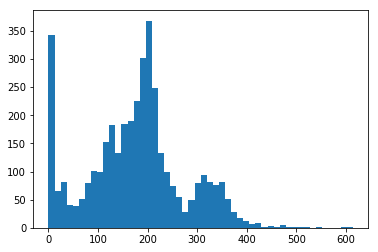

In [5]:
from matplotlib import pyplot as plt

plt.hist(list(character_counts_per_doc.values()), bins = 50)
plt.show()

# Display the images with the weirdest character counts.

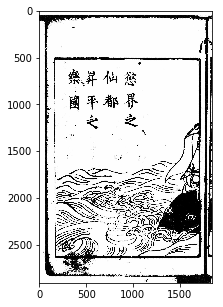

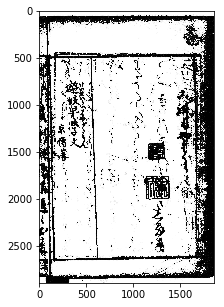

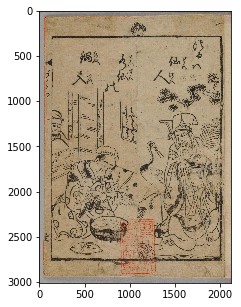

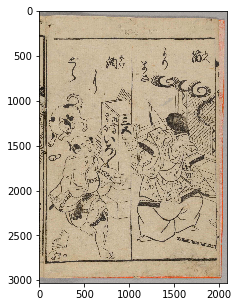

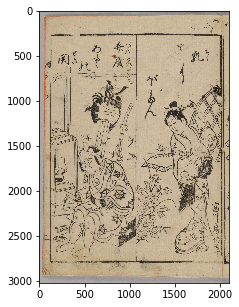

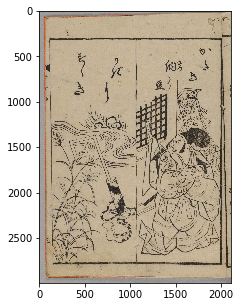

In [6]:
images_displayed = 0
max_images_to_display = 5

for image_id in character_counts_per_doc.keys():
    if character_counts_per_doc[image_id] > 0 and character_counts_per_doc[image_id] < 15:
        weird_image = Image.open(os.path.join('../Datasets/train_images', image_id + '.jpg'))
        plt.figure(figsize=(5, 5))
        plt.imshow(weird_image)
        plt.show()
        
        images_displayed += 1
        
    if images_displayed > max_images_to_display:
        break

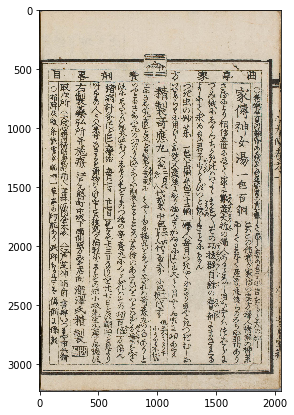

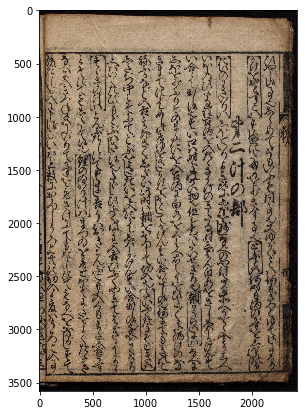

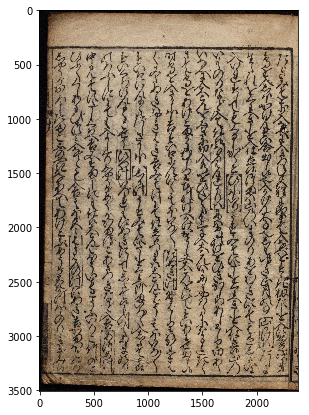

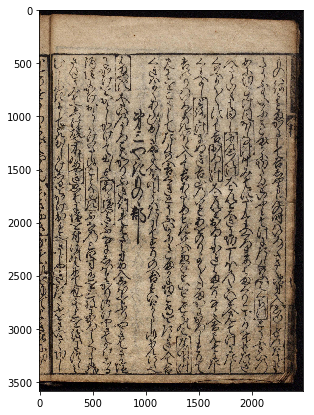

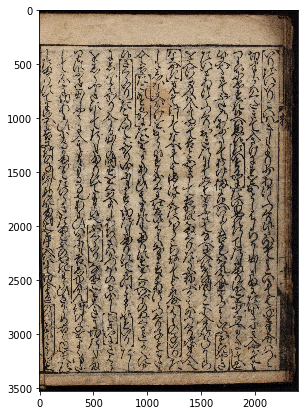

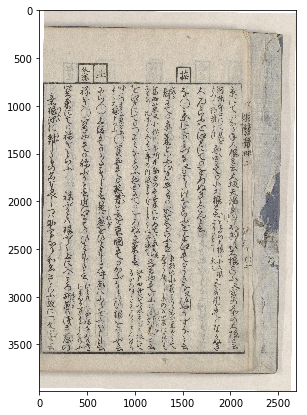

In [62]:
images_displayed = 0
max_images_to_display = 5

for image_id in character_counts_per_doc.keys():
    if character_counts_per_doc[image_id] > 500:
        weird_image = Image.open(os.path.join('../Datasets/train_images', image_id + '.jpg'))
        plt.figure(figsize=(7, 7))
        plt.imshow(weird_image)
        plt.show()
        
        images_displayed += 1
        
    if images_displayed > max_images_to_display:
        break

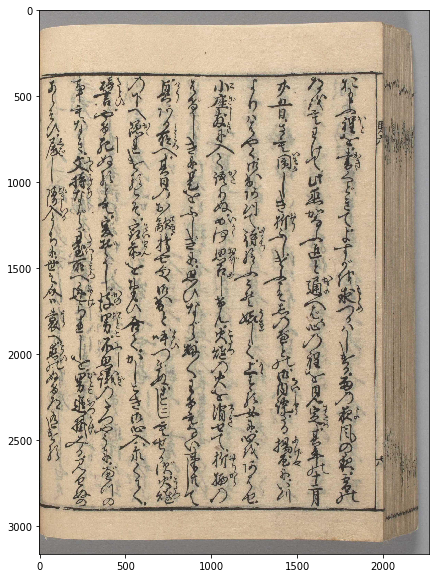

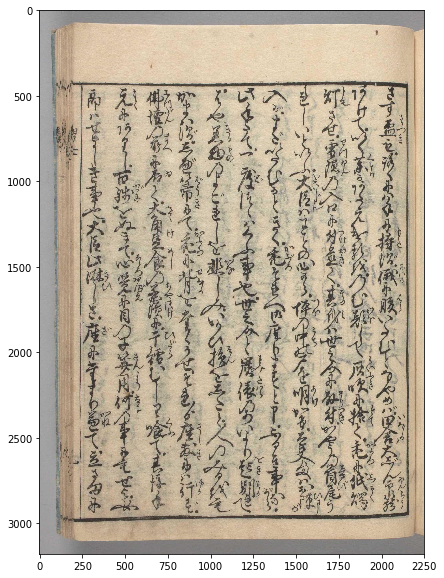

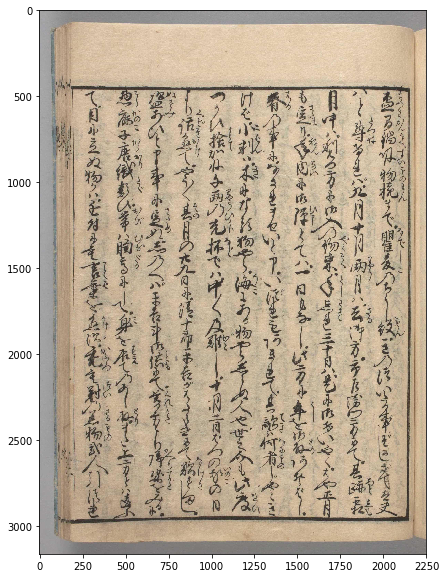

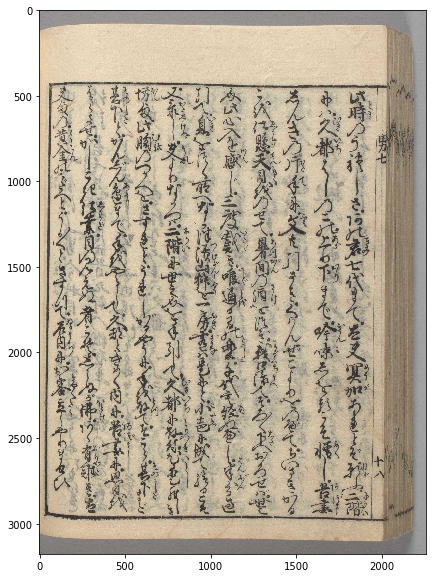

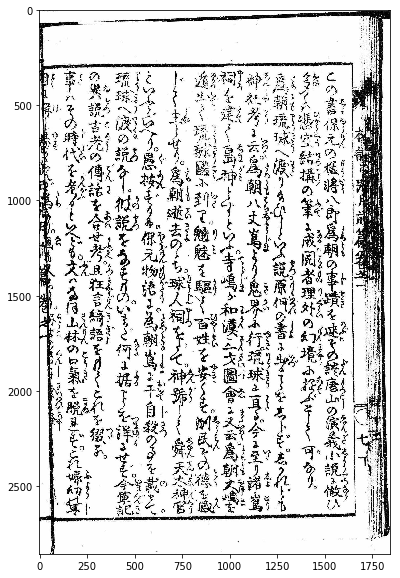

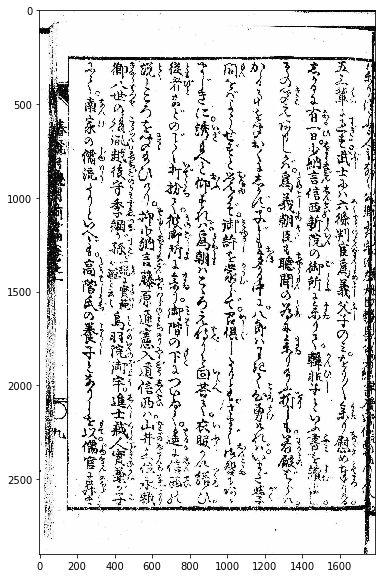

In [7]:
images_displayed = 0
max_images_to_display = 5

for image_id in character_counts_per_doc.keys():
    if character_counts_per_doc[image_id] > 300 and character_counts_per_doc[image_id] < 350:
        weird_image = Image.open(os.path.join('../Datasets/train_images', image_id + '.jpg'))
        plt.figure(figsize=(10, 10))
        plt.imshow(weird_image)
        plt.show()
        
        images_displayed += 1
        
    if images_displayed > max_images_to_display:
        break

# Get information about the aspect ratio of the chars.

[8 8 5 1 1 2 2 5 2 5]
['.75', '.75', 'y', 'g', 'g', 'r', 'r', 'y', 'r', 'y']


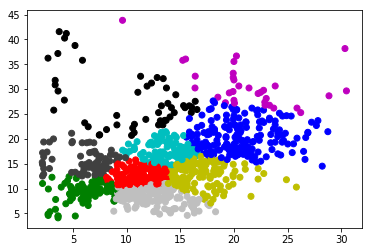

In [10]:
from sklearn.cluster import KMeans

POINTS_TO_DISPLAY = 1000

clustering_dataset = np.concatenate(
    (np.array(rescaled_widths).reshape(len(rescaled_widths), 1), 
     np.array(rescaled_heights).reshape(len(rescaled_heights), 1)),
    axis = 1)
model = KMeans(n_clusters=9).fit(clustering_dataset)
all_labels = model.predict(clustering_dataset[:POINTS_TO_DISPLAY])

cluster_colors = {0:'b', 1:'g', 2:'r', 3:'c', 4:'m', 5:'y', 6:'k', 7:'.25', 8:'.75'}
point_colors = [cluster_colors[cluster_label] for cluster_label in all_labels]
print(all_labels[:10])
print(point_colors[:10])

plt.scatter(rescaled_widths[:POINTS_TO_DISPLAY], rescaled_heights[:POINTS_TO_DISPLAY], c = point_colors)
plt.show()

# Get information about how frequently each type of char was observed

683464 characters were observed
4212 distinct types of characters were observed
Character occurrence count statistics:
Min: 1
1st pct: 1.0
10th pct: 1.0
25th pct: 2.0
50th pct: 9.0
75th pct: 44.0
90th pct: 165.9000000000001
99th pct: 2973.9800000000923
Max: 24685
Mean: 162.27
Std: 1106.34


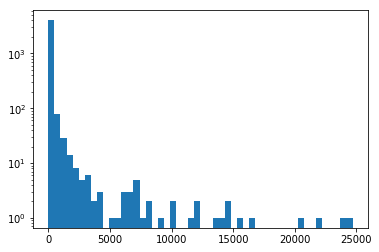

In [74]:
print(sum(character_counts_per_type.values()), 'characters were observed')
print(len(character_counts_per_type.keys()), 'distinct types of characters were observed')

print('Character occurrence count statistics:')
DisplayStats(list(character_counts_per_type.values()))

plt.hist(sorted(list(character_counts_per_type.values())), bins = 50, log=True)
#plt.set_yscale('log')
plt.show()

In [76]:
observed_common_characters_count = sum([
    v 
    for v in character_counts_per_type.values()
    if v > np.percentile(list(character_counts_per_type.values()), 80)])
print(observed_common_characters_count/sum(character_counts_per_type.values()))

0.9429333512811209
